In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def check_conditions(mat_a, mat_d):
    if np.array_equal(mat_a, mat_a.T):
        temp = np.linalg.inv(mat_d)@(mat_a-mat_d)
        if np.max(np.abs(np.linalg.eigvalsh(temp@temp.T))) < 1:
            return True
        else:
            return False
    else:
        return False

In [3]:
def jacobi(mat_a, vec_b):
    mat_d = np.diag(np.diag(mat_a))
    if check_conditions(mat_a, mat_d):
        vec_x = np.linalg.inv(mat_d)@(vec_b-(mat_a-mat_d)@np.ones(vec_b.shape)) # initialize x
        r = np.linalg.norm(mat_a@vec_x-vec_b)                                   # initialize residual
        acc = 0.001
        
        # lists for the plot
        r_list = np.array([])
        o_list = np.array([])
        r_list = np.append(r_list, r)
        o_list = np.append(o_list, 0.5*np.inner(vec_x, mat_a@vec_x)-np.inner(vec_x, vec_b))
        
        fig, axs = plt.subplots(1,2,figsize=(10,3))
        axs[0].set_title("Residual:")
        axs[1].set_title("The other thing:")
        i = 0
        
        while r > acc:
            vec_x = np.linalg.inv(mat_d)@(vec_b-(mat_a-mat_d)@vec_x)
            r = np.linalg.norm(mat_a@vec_x-vec_b)
            
            o_list = np.append(o_list, 0.5*np.inner(vec_x, mat_a@vec_x)-np.inner(vec_x, vec_b))
            r_list = np.append(r_list, r)
            i = i+1
            
        axs[0].plot(np.arange(0,i+1),r_list, 'o-')
        axs[1].plot(np.arange(0,i+1),o_list, 'o-')
        return vec_x
    else:
        print("conditions for convergence not met")
    return np.zeros(vec_b.shape)

In [4]:
def gauss_seidel(mat_a, vec_b):
    mat_l = np.tril(mat_a)
    if check_conditions(mat_a, mat_l):
        vec_x = np.linalg.inv(mat_l)@(vec_b-(mat_a-mat_l)@np.ones(vec_b.shape)) # initialize x
        r = np.linalg.norm(mat_a@vec_x-vec_b)                                   # initialize residual
        acc = 0.001
        
        # lists for the plot
        r_list = np.array([])
        o_list = np.array([])
        r_list = np.append(r_list, r)
        o_list = np.append(o_list, 0.5*np.inner(vec_x, mat_a@vec_x)-np.inner(vec_x, vec_b))
        
        fig, axs = plt.subplots(1,2,figsize=(10,3))
        axs[0].set_title("Residual:")
        axs[1].set_title("The other thing:")
        i = 0
        
        while r > acc:
            vec_x = np.linalg.inv(mat_l)@(vec_b-(mat_a-mat_l)@vec_x)
            r = np.linalg.norm(mat_a@vec_x-vec_b)
            
            o_list = np.append(o_list, 0.5*np.inner(vec_x, mat_a@vec_x)-np.inner(vec_x, vec_b))
            r_list = np.append(r_list, r)
            i = i+1
            
        axs[0].plot(np.arange(0,i+1),r_list, 'o-')
        axs[1].plot(np.arange(0,i+1),o_list, 'o-')
        return vec_x
    else:
        print("conditions for convergence not met")
    return np.zeros(vec_b.shape)

In [5]:
def gausElimPivot(mat_a, vec_b):
    if (np.linalg.det(mat_a) == 0):
        print("Error: det(A) = 0")
    else:
        np.seterr(divide='raise')
        try:
            mat_temp = np.copy(mat_a)
            vec_temp = np.copy(vec_b)
            n = vec_b.size
            for i in range (n-1):
                largest = np.absolute(mat_temp[i,i])
                largeest_i = i
                for k in range (i+1, n):
                    temp = np.absolute(mat_temp[k,i])
                    if (largest < temp):
                        largest = temp
                        largeest_i = k
                        
                mat_temp[[i, largeest_i]] = mat_temp[[largeest_i, i]]
                vec_temp[[i, largeest_i]] = vec_temp[[largeest_i, i]]
                
                if(mat_temp[i,i] != 0):
                    for j in range (i+1, n):
                        mult_fac = mat_temp[j,i]/mat_temp[i,i]
                        mat_temp[j,:] = mat_temp[j,:] - (mult_fac*mat_temp[i,:])
                        vec_temp[j] = vec_temp[j] - (mult_fac*vec_temp[i])
            
            # backward insertion here (maybe not as pretty but it works)
            x_vec = vec_b
            for i in range (n-1,-1,-1):
                for j in range (i+1, n):
                    vec_temp[i] = vec_temp[i]-(x_vec[j]*mat_temp[i,j])
                x_vec[i] = vec_temp[i]/mat_temp[i,i]
                
            return x_vec
        except FloatingPointError:
            print("###################################################################")
            print("Error: division by zero")
            print("###################################################################")

In [6]:
def gausElim(mat_a, vec_b):
    if (np.linalg.det(mat_a) == 0):
        print("Error: det(A) = 0")
    else:
        np.seterr(divide='raise')
        try:
            mat_temp = np.copy(mat_a)
            vec_temp = np.copy(vec_b)
            n = vec_b.size
            for i in range (n-1):
                if(mat_temp[i,i] != 0):
                    for j in range (i+1, n):
                        mult_fac = mat_temp[j,i]/mat_temp[i,i]
                        mat_temp[j,:] = mat_temp[j,:] - (mult_fac*mat_temp[i,:])
                        vec_temp[j] = vec_temp[j] - (mult_fac*vec_temp[i])
            
            # backward insertion here (maybe not as pretty but it works)
            x_vec = vec_b
            for i in range (n-1,-1,-1):
                for j in range (i+1, n):
                    vec_temp[i] = vec_temp[i]-(x_vec[j]*mat_temp[i,j])
                x_vec[i] = vec_temp[i]/mat_temp[i,i]
                
            return x_vec
        except FloatingPointError:
            print("###################################################################")
            print("Error: division by zero, trying to solve by using pivoting instead:")
            print("###################################################################")
            return gausElimPivot(mat_a, vec_b)

# Excercise 1

resulting x using jacobi: [0.8982031  0.81675104 1.86409237 0.23690745]
time needed: 0.03590703010559082s


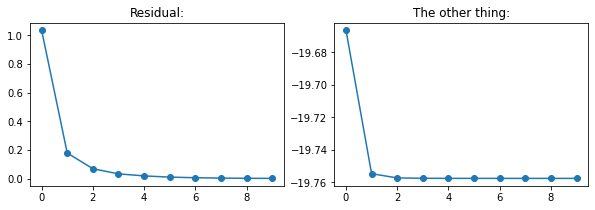

In [7]:
# given matrix A
mat_a = np.array([[5,0.5,1,1],[0.5,3,1,1],[1,1,7,1],[1,1,1,6]],dtype = np.double)

# and vector b
vec_b = np.array([7,5,15,5],dtype = np.double)

start = time.time()
print("resulting x using jacobi:", jacobi(mat_a, vec_b))
end = time.time()
print(f"time needed: {end - start}s")

resulting x using g-s: [0.89809823 0.81664028 1.86405923 0.23686704]
time needed: 0.0249330997467041s


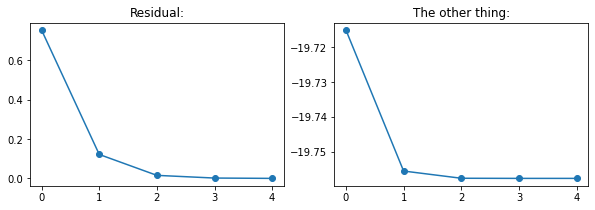

In [8]:
start = time.time()
print("resulting x using g-s:", gauss_seidel(mat_a, vec_b))
end = time.time()
print(f"time needed: {end - start}s")

We can see that the Gauß-Seidel solver takes less iterations to solve the linear system

# Exercise 2

We are going to be comparing the runtime of the Gauß-Seidel method with the Gauß-elimination algorithm. For this we implement the Gauß_seidel algorithm without checking for optimal conditions, as we will be giving a symmetric positive definite matrix with very large numbers on the diagonal which should be enough for now (no idea how to always get ones filled with random values that still satisfy our conditions).

In [9]:
def gauss_seidel_no_check(mat_a, vec_b):
    mat_l = np.tril(mat_a)
    vec_x = np.linalg.inv(mat_l)@(vec_b-(mat_a-mat_l)@np.ones(vec_b.shape)) # initialize x
    r = np.max(np.abs(mat_a@vec_x-vec_b))                                   # initialize residual
    acc = 10**-3
    
    while r > acc:
        vec_x = np.linalg.inv(mat_l)@(vec_b-(mat_a-mat_l)@vec_x)
        r = np.linalg.norm(mat_a@vec_x-vec_b)
            
    return vec_x

### 10

In [10]:
temp_10 = np.random.rand(10,10)
diag_10 = np.diag(np.diag(temp_10*900000))
mat_10 = np.dot(temp_10,temp_10.T)+diag_10
vec_10 = np.random.rand(10)

In [11]:
start = time.time()
result = gauss_seidel_no_check(mat_10, vec_10)
print("resulting x using Gauß-Seidel:", result)
end = time.time()
print(f"time needed: {end - start}s")

resulting x using Gauß-Seidel: [3.70703861e-07 8.66512012e-07 2.26032243e-07 7.36619459e-06
 1.08807237e-06 1.49480907e-05 8.32046251e-06 1.31318161e-07
 1.35722208e-06 1.78848307e-06]
time needed: 0.0009984970092773438s


In [12]:
start = time.time()
result = gausElim(mat_10, vec_10)
print("resulting x using Gauß-elim:", result)
end = time.time()
print(f"time needed: {end - start}s")

resulting x using Gauß-elim: [3.70703945e-07 8.66512056e-07 2.26032318e-07 7.36619471e-06
 1.08807238e-06 1.49480907e-05 8.32046251e-06 1.31318161e-07
 1.35722208e-06 1.78848307e-06]
time needed: 0.00101470947265625s


### 100

In [13]:
temp_100 = np.random.rand(100,100)
diag_100 = np.diag(np.diag(temp_100*900000))
mat_100 = np.dot(temp_100,temp_100.T)+diag_100
vec_100 = np.random.rand(100)

In [14]:
start = time.time()
result = gauss_seidel_no_check(mat_100, vec_100)
print("resulting x using Gauß-Seidel:", result)
end = time.time()
print(f"time needed: {end - start}s")

resulting x using Gauß-Seidel: [3.21803159e-07 4.02705937e-08 1.02719445e-06 6.66417952e-06
 9.43071748e-07 1.53516852e-05 1.29920313e-06 9.97544400e-06
 1.02580678e-06 1.02154489e-06 1.01580382e-06 1.43483927e-06
 1.92104006e-06 1.69968506e-07 4.89847669e-07 1.87431459e-06
 5.72266470e-07 1.01294191e-06 5.69985162e-06 3.21044289e-07
 1.64201281e-06 5.56127159e-07 2.48397124e-06 1.06233200e-06
 2.28644854e-06 4.20120231e-07 4.39384042e-07 1.42160115e-06
 4.51062370e-06 9.31048426e-07 5.52056453e-07 7.10033472e-08
 3.71575310e-07 5.90062915e-07 9.47640502e-06 2.22305191e-05
 2.05682684e-05 6.09902119e-07 1.50731019e-07 3.68716539e-07
 4.24797597e-06 2.38692712e-07 8.11378512e-07 1.37124175e-06
 6.21532985e-07 5.73590234e-06 2.08558656e-07 1.10236899e-05
 3.94052355e-06 5.87877401e-07 2.22934823e-05 3.88329553e-07
 1.23709354e-06 1.25380344e-06 7.07354888e-07 4.94229164e-07
 1.50763546e-06 1.13961325e-06 9.95499348e-07 2.00741483e-06
 2.77305631e-06 6.99157949e-07 7.06016268e-07 4.657893

In [15]:
start = time.time()
result = gausElim(mat_100, vec_100)
print("resulting x using Gauß-elim:", result)
end = time.time()
print(f"time needed: {end - start}s")

resulting x using Gauß-elim: [3.21359617e-07 3.98286283e-08 1.02677274e-06 6.66183572e-06
 9.42700062e-07 1.53454126e-05 1.29855595e-06 9.96279506e-06
 1.02568841e-06 1.02144791e-06 1.01571191e-06 1.43474401e-06
 1.92093586e-06 1.69877012e-07 4.89763003e-07 1.87416097e-06
 5.72206557e-07 1.01280692e-06 5.69955512e-06 3.20826404e-07
 1.64192236e-06 5.56070458e-07 2.48374962e-06 1.06228727e-06
 2.28636950e-06 4.20068057e-07 4.39291286e-07 1.42155056e-06
 4.51041710e-06 9.30998211e-07 5.52020821e-07 7.09192863e-08
 3.71524179e-07 5.90032651e-07 9.47615908e-06 2.22301349e-05
 2.05681229e-05 6.09895113e-07 1.50723318e-07 3.68710113e-07
 4.24794282e-06 2.38686409e-07 8.11367857e-07 1.37123629e-06
 6.21524577e-07 5.73587935e-06 2.08556353e-07 1.10236825e-05
 3.94052240e-06 5.87877056e-07 2.22935035e-05 3.88330569e-07
 1.23709504e-06 1.25380491e-06 7.07356501e-07 4.94230588e-07
 1.50763717e-06 1.13961522e-06 9.95501080e-07 2.00741843e-06
 2.77306012e-06 6.99160822e-07 7.06019256e-07 4.65792191

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


### 1000

In [16]:
temp_1000 = np.random.rand(1000,1000)
diag_1000 = np.diag(np.diag(temp_1000*900000))
mat_1000 = np.dot(temp_1000,temp_1000.T)+diag_1000
vec_1000 = np.random.rand(1000)

In [17]:
start = time.time()
result = gauss_seidel_no_check(mat_1000, vec_1000)
print("resulting x using Gauß-Seidel:", result)
end = time.time()
print(f"time needed: {end - start}s")

resulting x using Gauß-Seidel: [-6.50516349e-08 -1.15505414e-06 -2.21087282e-08 -1.05141410e-05
  4.74588293e-07 -2.87055326e-07  4.26775855e-08  3.81795440e-07
 -4.56986569e-07  2.16940122e-05 -3.29545063e-08  9.60500953e-05
 -2.97989568e-05 -1.40583979e-07  4.44513921e-07 -3.11130768e-07
  8.16985231e-07  4.64111602e-07 -1.32613990e-06 -1.28604589e-09
  3.99524481e-07  5.41559193e-07  2.46962080e-06 -1.14950250e-06
  5.00768592e-07  3.19318507e-06 -3.21344531e-07 -1.61010938e-07
 -4.79269008e-08  1.32826986e-06  2.76243998e-05 -8.04663622e-07
 -2.64372983e-08 -5.23830806e-06 -6.92624626e-06 -1.10050879e-06
 -4.99665355e-07  5.47380821e-07  8.44090726e-07 -4.02469942e-07
  2.24457147e-07 -2.51002642e-07  1.23604505e-06  5.12059742e-07
 -3.23317763e-07  3.40608076e-08 -2.17899808e-07  1.26089708e-06
 -1.86282550e-06 -5.18825851e-07  4.47570912e-07 -6.59533460e-08
  1.28986475e-06  4.51171325e-07 -2.09269929e-07 -4.74463092e-07
  8.17325198e-07 -3.72907228e-07  6.67925944e-07 -6.0761537

In [18]:
start = time.time()
result = gausElim(mat_1000, vec_1000)
print("resulting x using Gauß-elim:", result)
end = time.time()
print(f"time needed: {end - start}s")

resulting x using Gauß-elim: [-6.51362671e-08 -1.15510307e-06 -2.21372478e-08 -1.05147471e-05
  4.74561013e-07 -2.87091600e-07  4.26596177e-08  3.81777009e-07
 -4.57008486e-07  2.16927782e-05 -3.30132893e-08  9.60460942e-05
 -2.97996755e-05 -1.40593802e-07  4.44504066e-07 -3.11138590e-07
  8.16972329e-07  4.64096455e-07 -1.32616236e-06 -1.29914871e-09
  3.99514669e-07  5.41542927e-07  2.46959631e-06 -1.14952312e-06
  5.00762199e-07  3.19314657e-06 -3.21350660e-07 -1.61027608e-07
 -4.79352210e-08  1.32825597e-06  2.76241180e-05 -8.04747146e-07
 -2.64430218e-08 -5.23839226e-06 -6.92635473e-06 -1.10052934e-06
 -4.99673037e-07  5.47375426e-07  8.44084831e-07 -4.02477506e-07
  2.24451272e-07 -2.51006795e-07  1.23603585e-06  5.12037868e-07
 -3.23322428e-07  3.40483104e-08 -2.17904935e-07  1.26088899e-06
 -1.86284784e-06 -5.18832659e-07  4.47565091e-07 -6.59612943e-08
  1.28985509e-06  4.51163874e-07 -2.09274653e-07 -4.74468017e-07
  8.17319843e-07 -3.72929774e-07  6.67922107e-07 -6.07620820e

Given numbers that are large enough on the diagonal the Gauß-Seidel approach takes less time than the Gauß-elimination. It really took very high numbers to beat it though. Maybe if we compute optimal matrices that satisfy the conditions it would be faster. 